In [1]:
from realstatement_visualizing import Realstatement_visualizing

In [2]:
day_list=['2009-03-01','2013-03-01','2017-05-01','2021-02-01']

<module 'matplotlib.pyplot' from '/Users/donut/PycharmProjects/pythonProject/venv/lib/python3.9/site-packages/matplotlib/pyplot.py'>

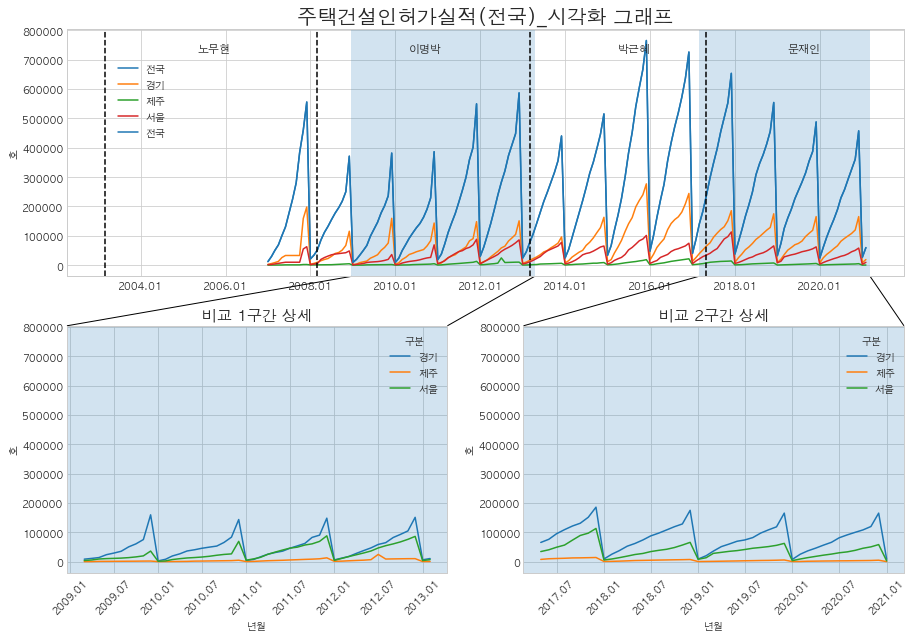

In [3]:
rv = Realstatement_visualizing()
rv.file_name = "주택건설인허가실적"
rv.ytic_main_sub_choice(rv.file_name)
df = rv.load_csv_file(rv.file_name)
day_data = rv.make_day_dict(day_list)
df = rv.data_preprocessing(df)
rv.triple_grap(day_data)

<module 'matplotlib.pyplot' from '/Users/donut/PycharmProjects/pythonProject/venv/lib/python3.9/site-packages/matplotlib/pyplot.py'>

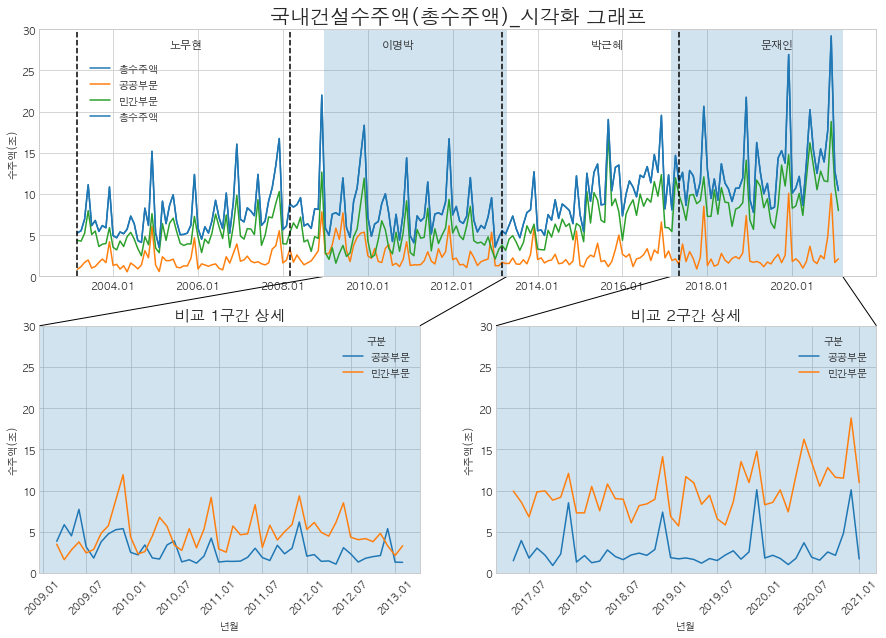

In [4]:
rv = Realstatement_visualizing()
rv.file_name = "국내건설수주액"
rv.ytic_main_sub_choice(rv.file_name)
df = rv.load_csv_file(rv.file_name)
day_data = rv.make_day_dict(day_list)
df = rv.data_preprocessing(df)
rv.triple_grap(day_data)

<module 'matplotlib.pyplot' from '/Users/donut/PycharmProjects/pythonProject/venv/lib/python3.9/site-packages/matplotlib/pyplot.py'>

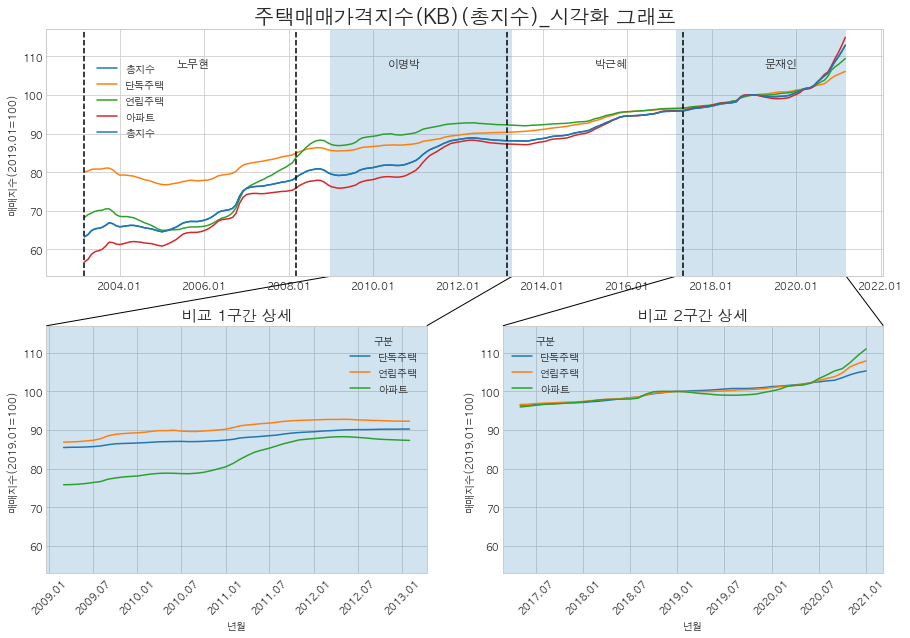

In [5]:
rv = Realstatement_visualizing()
rv.file_name = "주택매매가격지수(KB)"
rv.ytic_main_sub_choice(rv.file_name)
df = rv.load_csv_file(rv.file_name)
df = rv.data_preprocessing(df)
rv.triple_grap(day_data)



<module 'matplotlib.pyplot' from '/Users/donut/PycharmProjects/pythonProject/venv/lib/python3.9/site-packages/matplotlib/pyplot.py'>

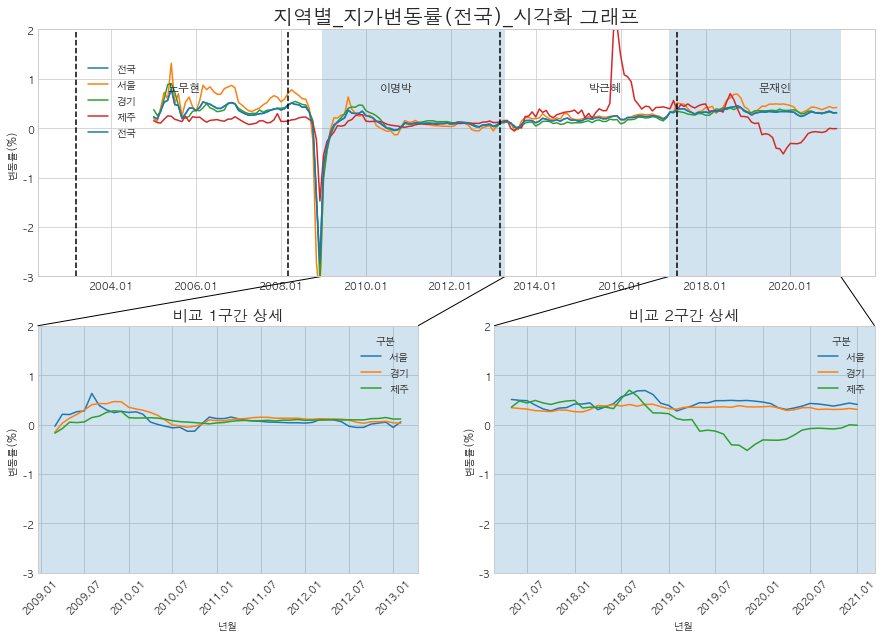

In [6]:

rv = Realstatement_visualizing()
rv.file_name = "지역별_지가변동률"
rv.ytic_main_sub_choice(rv.file_name)
df = rv.load_csv_file(rv.file_name)
day_data = rv.make_day_dict(day_list)
df = rv.data_preprocessing(df)
rv.triple_grap(day_data)